In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Read data
data = pd.read_csv('results.csv')
data.head()

,database,chunk_size,overlap,clean,embedding,chunks_processed,time_to_process,used_memory_mb,query_time
0,redis,100,0,True,nomic-embed-text,415,10.429698,6.939438,9.210070
1,redis,100,0,False,nomic-embed-text,423,10.188590,7.004440,9.450322
2,redis,100,0,True,mxbai-embed-large,415,11.470970,3.644882,11.935679
3,redis,100,0,False,mxbai-embed-large,423,15.373759,3.713348,11.927754
4,redis,100,0,True,bge-m3,415,15.408778,3.661789,11.489007


In [3]:
# Split data by database
redis = data[data['database'] == 'redis']
chroma = data[data['database'] == 'chroma']
milvus = data[data['database'] == 'milvus']


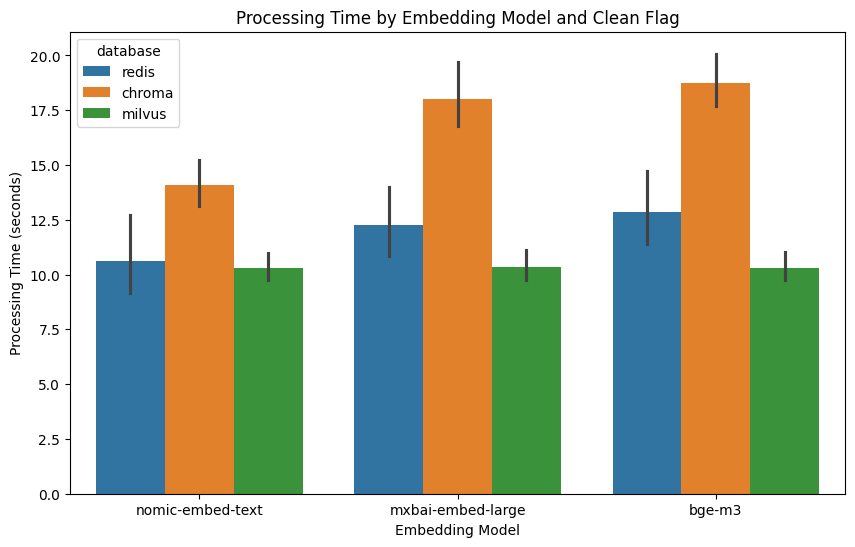

In [4]:
# Bar Chart: Processing Time vs Embedding Model for each Database
plt.figure(figsize=(10, 6))
sns.barplot(x='embedding', y='time_to_process', hue='database', data=data)
plt.title('Processing Time by Embedding Model and Clean Flag')
plt.xlabel('Embedding Model')
plt.ylabel('Processing Time (seconds)')
plt.show()

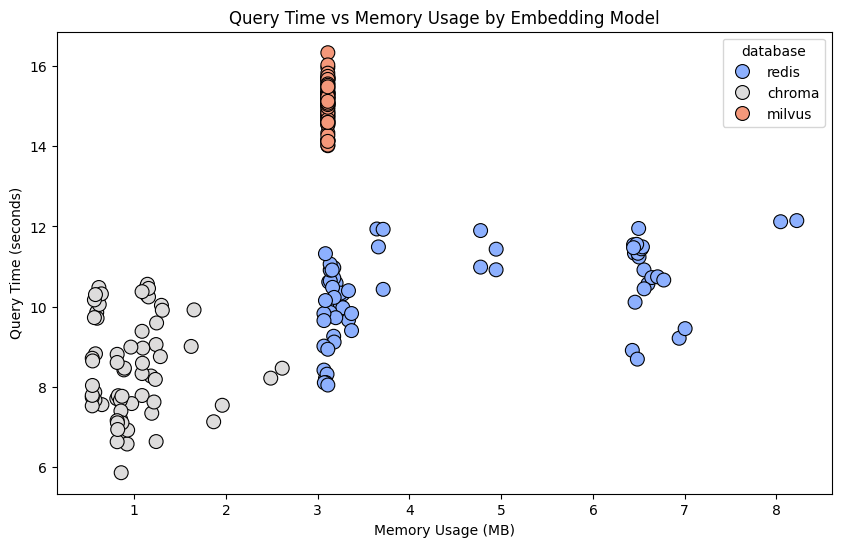

In [5]:
# Scatter Plot: Query Time vs Memory Usage by Database
plt.figure(figsize=(10, 6))
sns.scatterplot(x='used_memory_mb', y='query_time', hue='database', data=data, s=100, palette='coolwarm', edgecolor="black")
plt.title('Query Time vs Memory Usage by Embedding Model')
plt.xlabel('Memory Usage (MB)')
plt.ylabel('Query Time (seconds)')
plt.show()

Text(1449.2516339869283, 0.5, 'Overlap')

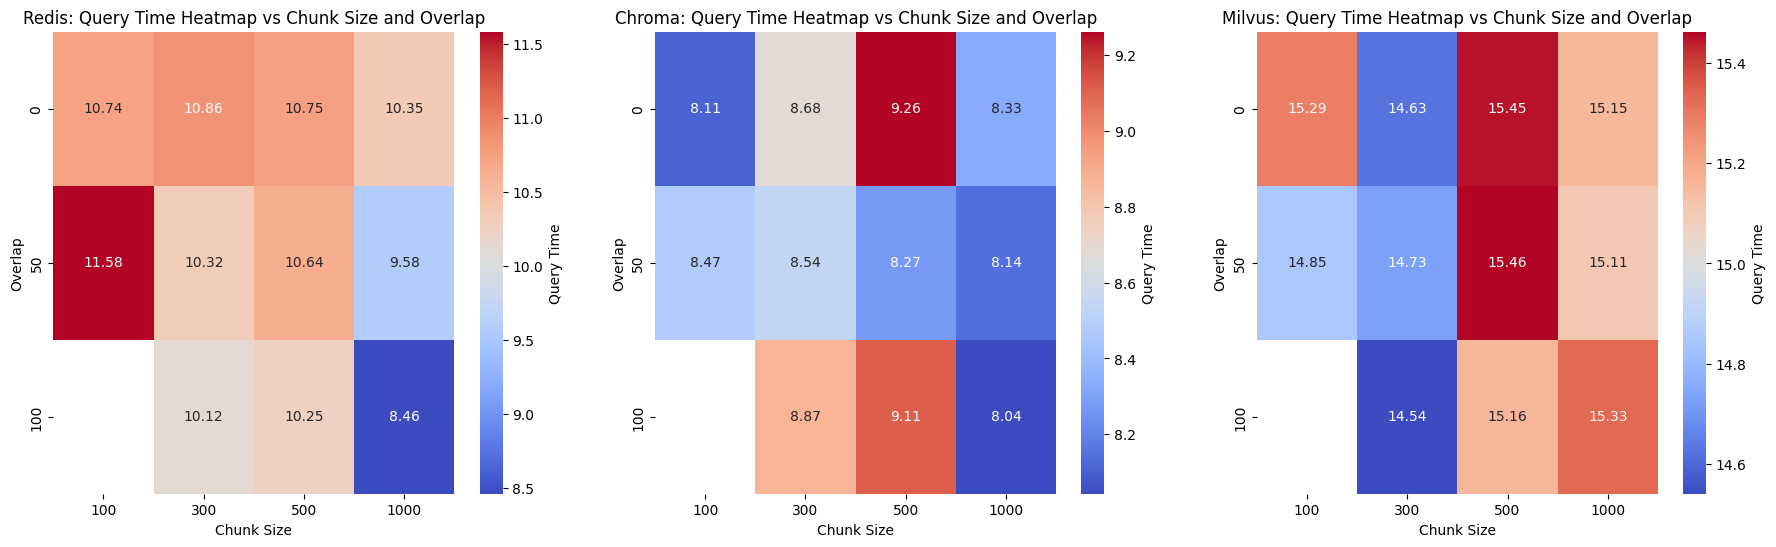

In [6]:
# Heatmap: Query Time vs Chunk Size and Overlap
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# Redis
pivot_redis = redis.pivot_table(values='query_time', index='overlap', columns='chunk_size', aggfunc='mean')
sns.heatmap(pivot_redis, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[0], cbar_kws={'label': 'Query Time'})
axes[0].set_title('Redis: Query Time Heatmap vs Chunk Size and Overlap')
axes[0].set_xlabel('Chunk Size')
axes[0].set_ylabel('Overlap')

# Chroma
pivot_chroma = chroma.pivot_table(values='query_time', index='overlap', columns='chunk_size', aggfunc='mean')
sns.heatmap(pivot_chroma, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1], cbar_kws={'label': 'Query Time'})
axes[1].set_title('Chroma: Query Time Heatmap vs Chunk Size and Overlap')
axes[1].set_xlabel('Chunk Size')
axes[1].set_ylabel('Overlap')

# Milvus
pivot_milvus = milvus.pivot_table(values='query_time', index='overlap', columns='chunk_size', aggfunc='mean')
sns.heatmap(pivot_milvus, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[2], cbar_kws={'label': 'Query Time'})
axes[2].set_title('Milvus: Query Time Heatmap vs Chunk Size and Overlap')
axes[2].set_xlabel('Chunk Size')
axes[2].set_ylabel('Overlap')

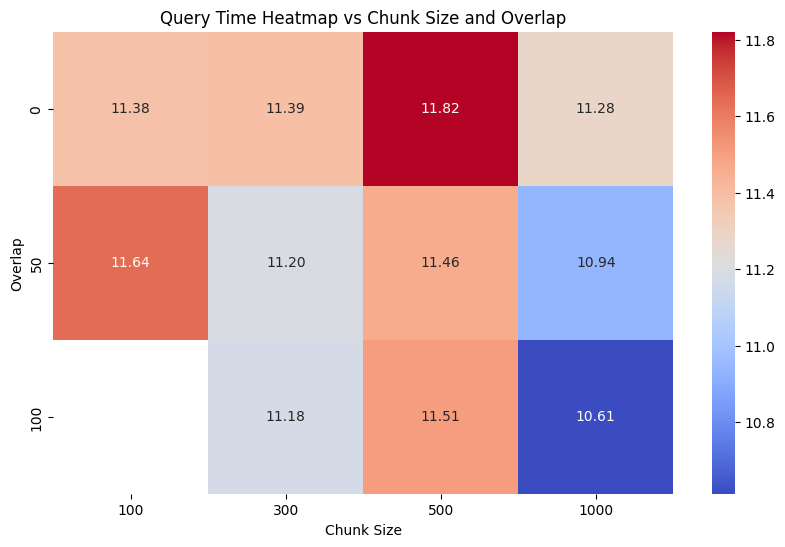

In [7]:

# Heatmap: Query Time vs Chunk Size and Overlap
pivot_table = data.pivot_table(values='query_time', index='overlap', columns='chunk_size', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Query Time Heatmap vs Chunk Size and Overlap')
plt.xlabel('Chunk Size')
plt.ylabel('Overlap')
plt.show()

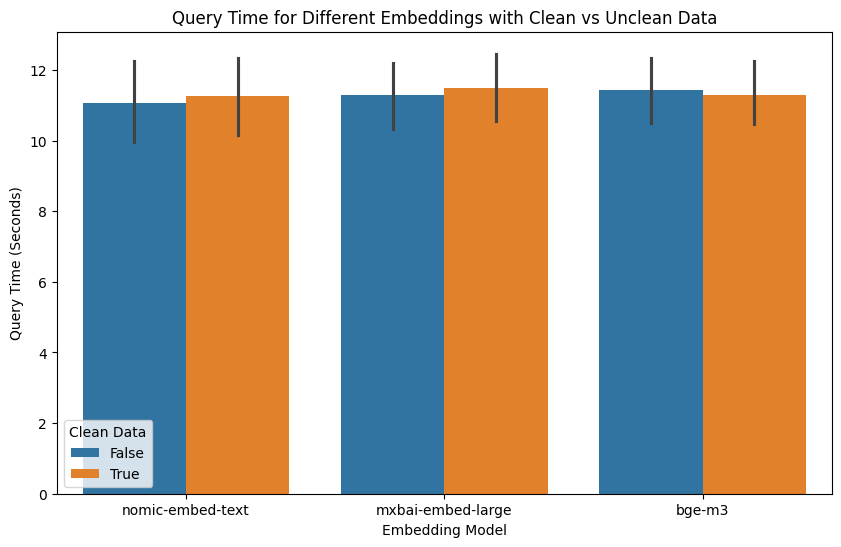

In [8]:
# Bar Graph: Processing Time for Embeddings - Clean vs. Unclean
plt.figure(figsize=(10, 6))
sns.barplot(x="embedding", y="query_time", hue="clean", data=data)
plt.title("Query Time for Different Embeddings with Clean vs Unclean Data")
plt.xlabel("Embedding Model")
plt.ylabel("Query Time (Seconds)")
plt.legend(title="Clean Data")
plt.xticks()
plt.show()

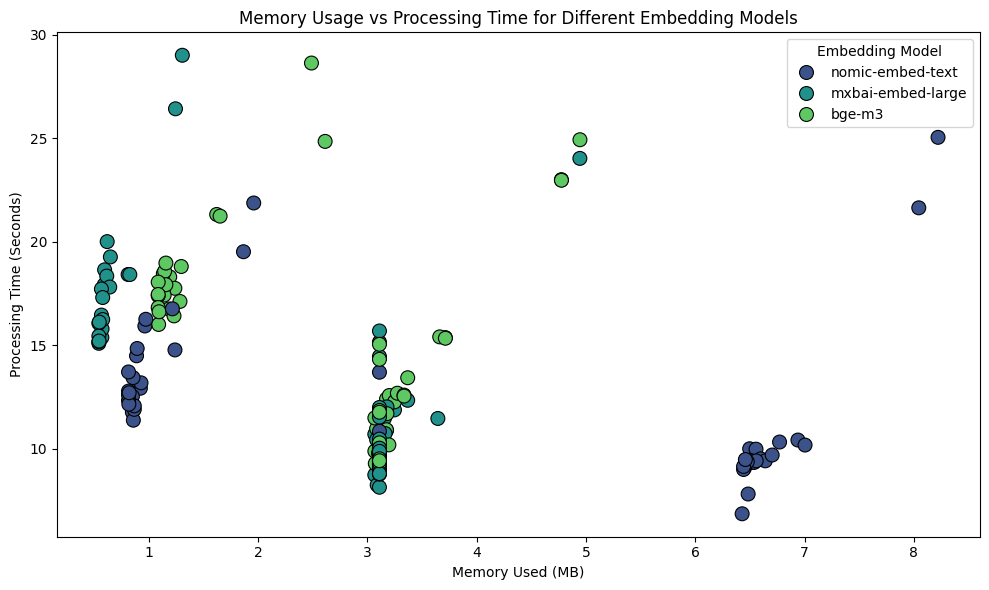

In [9]:
# Scatter Plot: Memory Usage vs. Processing Time by Embedding Model
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x="used_memory_mb", y="time_to_process", hue="embedding", palette="viridis", data=data, s=100, edgecolor="black")
plt.title("Memory Usage vs Processing Time for Different Embedding Models")
plt.xlabel("Memory Used (MB)")
plt.ylabel("Processing Time (Seconds)")
plt.legend(title="Embedding Model")
plt.tight_layout()
plt.show()